In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import netCDF4 as cdf
import h5py as hdf
from tm5tools import globarea
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from mpl_toolkits.basemap import Basemap
from maptools import select_map
import csv
import sys
from copy import copy
import pandas as pd
import os,sys
from calendar import monthrange,isleap
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from __future__ import division


In [3]:
#option='koppen'
#option='koppen-sam-adj'
#option='sib'
#option='sib-koppen'
option='casa'

biomes_casa=['Water',                        #0
             'Evergreen needleleaf forest',  #1
             'Evergreen broadleaf forest',   #2
             'Deciduous needleleaf forest',  #3
             'Deciduous broadleaf forest',   #4
             'Mixed forests',                #5
             'Shrublands',                   #6
             'Savanna and grasslands',       #7 
             'Permanent wetlands',           #8
             'Croplands',                    #9
             'Urban and built-up',           #10
             'Barren or sparsely vegetated', #11
             'Permanent snow and ice']       #12


clrs_casa=['lightgray',     #0
           'darkgreen',     #1
           'green',         #2
           'yellow',        #3
           'magenta',       #4
           'orange',        #5
           'brown',         #6
           'lawngreen',     #7
           'purple',        #8
           'darkslateblue', #9
           'orangered',     #10
           'wheat',         #11
           'tan']           #12

clrs_casa_mod=['green',         #2
               'magenta',       #4
               'brown',         #6
               'lawngreen',     #7
               'darkslateblue'] #9
           

13


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


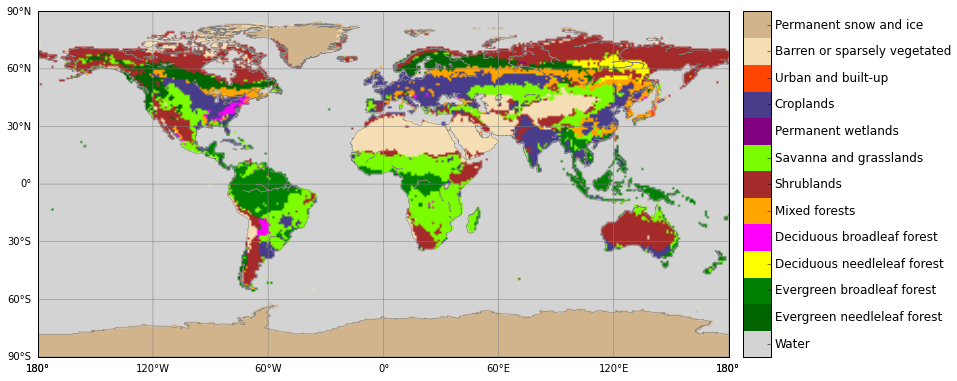

In [4]:
#CASA
ff='Landcover2.csv'
biomesmap=[]

with open(ff,'rb') as csvfile:
    csvreader=csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        biomesmap.append([float(item) for item in row]) 
        
biomesmap=np.array(biomesmap)
biomesmap=biomesmap[::-1]
biomes_casa_1x1=np.zeros((180,360),float)

for i in range(180):
    for j in range(360):
        lst = biomesmap[i+i:(i+1)*2,j+j:(j+1)*2].flatten().tolist()
        biomes_casa_1x1[i,j]=max(set(lst), key=lst.count)

if option == 'casa':
    clrs = clrs_casa
    plotmap = biomes_casa_1x1
    maxnr = len(biomes_casa)
    print maxnr
    labels = biomes_casa
    savename = 'Casa_biome_map.png'

fig=plt.figure(figsize=(15,6))
ax=fig.add_axes([0.05,0.1,0.7,0.8])
m,nx,ny=select_map('Global Cylinder')
m.drawcoastlines(color='grey',linewidth=0.5)
m.drawparallels(np.arange(-90,91,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,60),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1])
cmap = mpl.colors.ListedColormap(clrs)
im=m.imshow(plotmap,cmap=cmap)
bounds=np.arange(-0.5,maxnr+0.5,1)
ticks=np.arange(0,maxnr+1,1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.2)
cbar=plt.colorbar(im,boundaries=bounds,ticks=ticks,cax=cax)
cbar.ax.set_yticklabels(labels,va='center',fontsize=12)
fig.savefig(savename)
plt.show()
    

<type 'numpy.ndarray'>


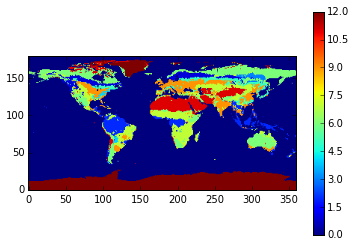

In [5]:
imshow(biomes_casa_1x1)
colorbar()
plt.gca().invert_yaxis()
print type(biomes_casa_1x1)

numpy.ndarray

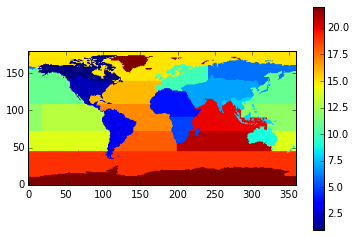

In [6]:
## Creating masks
f = cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/regions_sibcasa_koppen_sam.nc') # assigning to f the dataset from the netcdf file
#print f.dimensions.keys()
#print f.dimensions['lat'] 
#print f.dimensions['lon']
tc = f.variables['transcom_regions'][:]     #from f the variable transcom_regions is assigned to tc
#biomes = f.variables['land_ecosystems'][:]  # This biomes, include the whole world and the ocean has nothing assigned (NaN).
f.close() 
imshow (tc)
colorbar()
plt.gca().invert_yaxis()
type(tc)

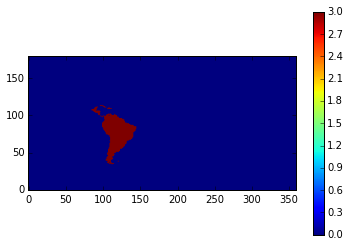

In [7]:
index = np.where(tc <> 3)           # defines an index for the places where the transcom regions are different than 3
tc[index] = 0                       # everywhere in tc where the index is present (not 3) is equal to zero

imshow(tc)
colorbar()
plt.gca().invert_yaxis()

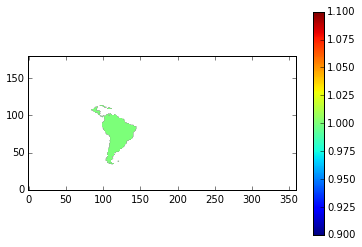

In [8]:
index = np.where(tc <> 0)           # a new index to redefine tc
tc[index] = 1                       # everywhere in tc where the index is present, 3, is equal to 1
tc = np.ma.masked_where(tc == 0,tc) # masks array where a condition is met, it changes the type of tc to masked array, it was a numpy array
                                    # the condition is that where tc is zero (oceans), it is masked
                                    # numpy.ma.masked_where(condition, a, copy=True)
        
imshow(tc)
colorbar()
plt.gca().invert_yaxis()

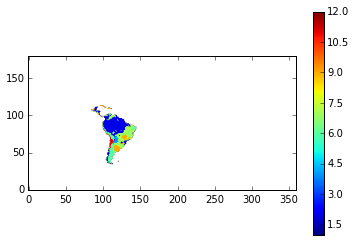

In [9]:
biomes_casa_1x1 = np.ma.masked_where(tc == 0,biomes_casa_1x1) # same as above
biomes_casa_1x1 = np.ma.masked_where(biomes_casa_1x1 == 0,biomes_casa_1x1)
# Biomes = 0 is the ocean, and tc = 0 is the land, except for SAM, so this places are masked.
imshow(biomes_casa_1x1)
colorbar()
plt.gca().invert_yaxis()
#print type(biomes), shape(biomes)
#OUTPUT: Biome map for southamerica 

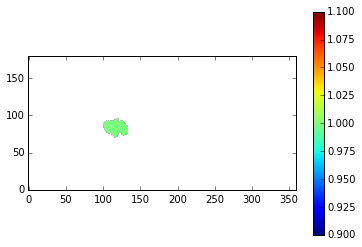

In [10]:
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
# the mask has a 1x1 degree resolution
mask = mf.variables['regionmask'][:]
mask = np.ma.masked_where(mask==0,mask)
glarea = globarea(im=360,jm=180)
imshow(mask)
colorbar()
plt.gca().invert_yaxis()


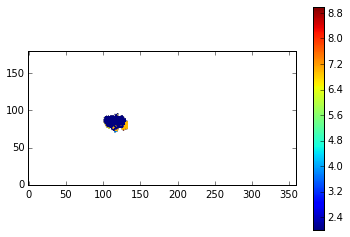

In [11]:
biomes_amazon_casa_1x1 = np.ma.masked_where(mask == NaN,biomes_casa_1x1) 
#imshow(biomes_amazon_casa_1x1)
#biomes_amazon_casa_1x1 = np.ma.masked_where(biomes_amazon_casa_1x1 == 0,biomes_casa_1x1)
imshow(biomes_amazon_casa_1x1)
colorbar()
plt.gca().invert_yaxis()

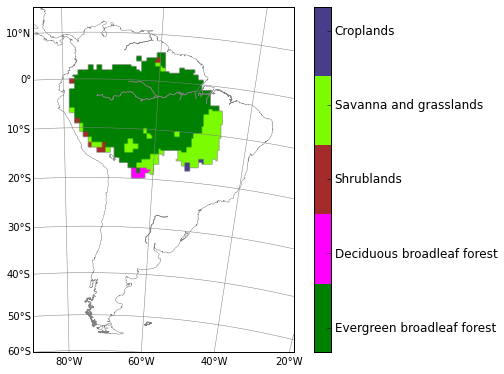

In [17]:
lons =np.arange(-179.5,180,1)
lats=np.arange(-89.5,90,1)

clrs = clrs_casa_mod
plotmap = biomes_amazon_casa_1x1

labels = ['Evergreen broadleaf forest', 'Deciduous broadleaf forest', 'Shrublands',                   
          'Savanna and grasslands',      
          'Croplands']

maxnr = len(labels)
savename = 'Casa_biome_amazon_map.png'

fig=plt.figure(figsize=(8,6))
ax=fig.add_axes([0.05,0.1,0.7,0.8])
m,nx,ny=select_map('South America Albers')
fluxmap = m.transform_scalar((plotmap),lons,lats,nx,ny,order=0)
#bounds=np.arange(-0.5,maxnr+0.5,1)
ticks =np.arange(0,maxnr+1,1)
m.drawcoastlines(color='grey',linewidth=0.5)
m.drawparallels(np.arange(-60,30,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,0,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1])
cmap = mpl.colors.ListedColormap(clrs)
im=m.imshow(fluxmap,cmap=cmap)
#bounds=np.arange(0.5,maxnr+0.5,1)
#bounds=np.arange(0,10,0.2)
ticks=np.arange(2.5,9.8,1.5)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="4%", pad=0.2)
#cbar=plt.colorbar(im,boundaries=bounds,ticks=ticks,cax=cax)
cbar=plt.colorbar(im,ticks=ticks)#,boundaries=bounds,ticks=ticks)#,cax=cax)
cbar.ax.set_yticklabels(labels,va='center',fontsize=12)
fig.savefig(savename,DPI=1000)

plt.show()

In [18]:
biome_names_list = []
area_list = []
for b in range(13):
    biome_names_list.append(biomes_casa[b])
    maskb = np.zeros((180,360))+1
    maskb = np.ma.masked_where(biomes_casa_1x1*mask!=b,maskb)
    area = ((maskb*glarea).sum())/1e6
    area_list.append('%.2f'%(area))
    data_series_area = {'Area km2':area_list}
    df_areas = pd.DataFrame(data_series_area,index=biome_names_list)
    #print biomes_sib_koppen[b],((maskb*glarea).sum())/1e6,'km2'
df_areas


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/ma/core.py:4139: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


,Area km2
Water,nan
Evergreen needleleaf forest,nan
Evergreen broadleaf forest,5723675.93
Deciduous needleleaf forest,nan
Deciduous broadleaf forest,70140.56
Mixed forests,nan
Shrublands,97019.73
Savanna and grasslands,1121745.35
Permanent wetlands,nan
Croplands,35561.38


[81.208283807580827, 0.99516369769429824, 1.3765289763312758, 15.915473876703935, 0.50454964168965943]


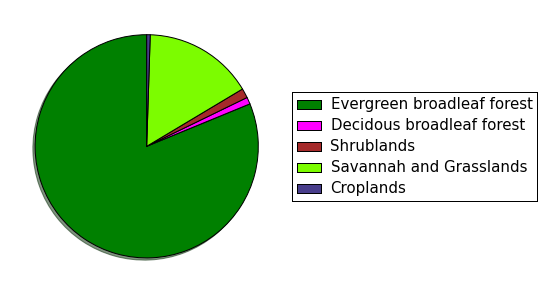

In [19]:
df_areas = df_areas.astype(float)
areas = df_areas['Area km2'].values
total_area = df_areas.sum()
pie_list = []
legenda = ['Evergreen broadleaf forest','Decidous broadleaf forest', 'Shrublands','Savannah and Grasslands', 'Croplands']

fig = plt.figure(1,figsize=(5,5))
for i in areas:
    pie_list.append((i/total_area[0])*100)
pie_list = [x for x in pie_list if str(x) != 'nan']
print pie_list

plt.pie(pie_list,colors=clrs_casa_mod,startangle=90,shadow=True)
plt.legend(legenda,loc='center left',bbox_to_anchor=(1, 0.5)) 
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize='15')  
fig.savefig('casa_areas.png',DPI=1000)

In [15]:
df_areas = df_areas.astype(float)
total_area = df_areas.sum()
total_area

Area km2    7048142.95
dtype: float64

# Burned Area Analysis

In [12]:
glarea = globarea(im=360,jm=180)
def sib_to_1x1(sib):
    sib1x1 = np.zeros((180,360),float)
    filename = '%s/%s/hsib_%4d%02d.qp2.nc'%('/Users/botia/sibcasa_layers','00-Sib',2010,1)
    d = cdf.Dataset(filename)
    latindex = d.variables['latindex'][:]
    lonindex = d.variables['lonindex'][:]
    for i in range(14538):
        lat=latindex[i]
        lon=lonindex[i]
        sib1x1[lat-1,lon-1]=sib[i]
    return sib1x1

In [13]:
def make_map(fill_color = True):
    m,nx,ny = select_map('South America Albers')
    m.drawcoastlines(color='grey',linewidth=0.5)
    m.drawcountries(color='grey',linewidth=0.5) 
    if fill_color:
        m.drawmapboundary(fill_color='#d8d8d8')
        m.drawparallels(np.arange(-90,91,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,0],fontsize=13)
        m.drawmeridians(np.arange(-180,180,15),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,0],fontsize=13)
    return m,nx,ny

/Users/botia/mnt/promise/CO2/ingrid/SiBCASA/input/gfed4_ba/monthly/
2010
2011
2012
2013
2014
2015


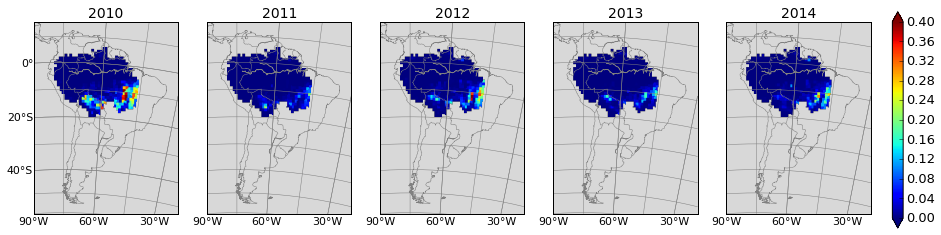

In [14]:
directory = ['/Users/botia/mnt/promise/CO2/ingrid/SiBCASA/input/gfed4_ba/monthly/']
lons=np.arange(-179.5,180,1)
lats=np.arange(-89.5,90,1)

minyear = 2010
maxyear = 2016

fig = plt.figure(1,figsize=(15,10))

for ii,dirbf in enumerate(directory):
    alltimes = []
    allba    = []
    print dirbf
    for y in range(minyear,maxyear):
        print y
        for fname in os.listdir(dirbf):
            #print fname[11:15]
            if not int(fname[11:15]) == y: continue
            bf = cdf.Dataset(dirbf+fname)
            burned_area = np.float32(bf.variables['ba'][:])
            burned_area_1x1 = sib_to_1x1(burned_area)
            
            if int(fname[15:17]) == 1:
                burned_area_year = burned_area_1x1
                #print burned_area_year[100][200]
            else:
                burned_area_year = burned_area_year + burned_area_1x1  
                #print burned_area_year[100][200], burned_area_1x1[100][200]
        
        if y == 2010:
            ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=1)
            ax1.set_title('%i'%(y),fontsize=14)
            m,nx,ny = make_map()
            m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
            m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
            fluxmap = m.transform_scalar((burned_area_year*mask),lons,lats,nx,ny,order=0)
            q=m.imshow(fluxmap,vmin=0,vmax=0.4)
            ba2010 = burned_area_year
        if y == 2011:
            ax1 = plt.subplot2grid((1, 5), (0, 1), colspan=1)
            ax1.set_title('%i'%(y),fontsize=14)
            m,nx,ny = make_map()
            #m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
            m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
            fluxmap = m.transform_scalar((burned_area_year*mask),lons,lats,nx,ny,order=0)
            q=m.imshow(fluxmap,vmin=0,vmax=0.4)
            ba2011 = burned_area_year
        if y == 2012:
            ax1 = plt.subplot2grid((1, 5), (0, 2), colspan=1)
            ax1.set_title('%i'%(y),fontsize=14)
            m,nx,ny = make_map()
            #m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
            m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
            fluxmap = m.transform_scalar((burned_area_year*mask),lons,lats,nx,ny,order=0)
            q=m.imshow(fluxmap,vmin=0,vmax=0.4)
            ba2012 = burned_area_year
        if y == 2013:
            ax1 = plt.subplot2grid((1, 5), (0, 3), colspan=1)
            ax1.set_title('%i'%(y),fontsize=14)
            m,nx,ny = make_map()
            #m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
            m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
            fluxmap = m.transform_scalar((burned_area_year*mask),lons,lats,nx,ny,order=0)
            q=m.imshow(fluxmap,vmin=0,vmax=0.4)
            ba2013 = burned_area_year
        if y == 2014:
            ax1 = plt.subplot2grid((1, 5), (0, 4), colspan=1)
            ax1.set_title('%i'%(y),fontsize=14)
            m,nx,ny = make_map()
            #m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
            m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
            fluxmap = m.transform_scalar((burned_area_year*mask),lons,lats,nx,ny,order=0)
            q=m.imshow(fluxmap,vmin=0,vmax=0.4)
            ba2014 = burned_area_year
        
#plt.figtext(0.4,0.32,'Fraction of burned area per grid box',fontsize=20)
#fig.subplots_adjust(right=0.85,top=0.9,wspace=-0.2,hspace=0.045)
cbar_ax = fig.add_axes([0.92, 0.36, 0.01, 0.3]) # left, bottom, width, height
cbar = fig.colorbar(q,cax=cbar_ax,extend='both')

#cbar = fig.colorbar(q, extend='max',orientation='horizontal')
cbar.ax.tick_params(labelsize=13)
#cbar.set_label('Fraction of burned area per grid box', fontsize = 16)

fig.savefig('BurnedArea_2010-2014.png',bbox_inches='tight',DPI=1000) # I can add DPI to get higher resolution
plt.show()
plt.close()   

In [15]:
avg_ba = (ba2010 + ba2011 + ba2012 + ba2013 + ba2014)/5
avgg = (avg_ba*glarea*mask).sum()/1e6
print avgg

106748.763299


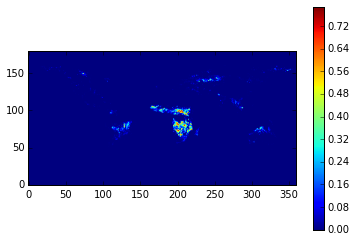

In [16]:
biomes_amazon_casa_1x1[np.where(biomes_amazon_casa_1x1.mask)] = 0
imshow(ba2010)
colorbar()
plt.gca().invert_yaxis()

In [24]:
ebf      = np.zeros((180,360),float) 
deci     = np.zeros((180,360),float) 
shr      = np.zeros((180,360),float) 
sava     = np.zeros((180,360),float) 
crops    = np.zeros((180,360),float)

ba_ebf   = np.zeros((180,360),float)
ba_deci  = np.zeros((180,360),float)
ba_shr   = np.zeros((180,360),float)
ba_sava  = np.zeros((180,360),float)
ba_crops = np.zeros((180,360),float)

year = ba2014
for i in range(180):
    for j in range(360):
        bio = int((biomes_amazon_casa_1x1)[i,j])
        
        if bio == 2:
            ebf[i][j]   = 1
            ba_ebf[i,j] = year[i,j]  
        if bio == 4:
            deci[i][j] = 1
            ba_deci[i,j] = year[i,j]
        if bio == 6:
            shr[i][j] = 1
            ba_shr[i,j] = year[i,j]
        if bio == 7:
            sava[i][j] = 1 
            ba_sava[i,j] = year[i,j]
        if bio == 9:
            crops[i][j] = 1
            ba_crops[i,j] = year[i,j]
        
#area_ebf       = (ebf*glarea).sum()/1e6
ba_ebf_avg      = (ba_ebf*glarea).sum()/1e6
ba_deci_avg     = (ba_deci*glarea).sum()/1e6
ba_shr_avg      = (ba_shr*glarea).sum()/1e6
ba_sava_avg     = (ba_sava*glarea).sum()/1e6
ba_crops_avg    = (ba_crops*glarea).sum()/1e6

print ba_ebf_avg #ba_ebf_avg/ 
print ba_deci_avg#ba_deci_avg/avgg    
print ba_shr_avg #ba_shr_avg/avgg      
print ba_sava_avg# ba_sava_avg/avgg    
print ba_crops_avg# ba_crops_avg/avgg   

#print ba_ebf_avg + ba_deci_avg + ba_shr_avg + ba_sava_avg + ba_crops_avg 

21255.0847973
41.3716994649
161.841898358
64482.0657408
286.814199712


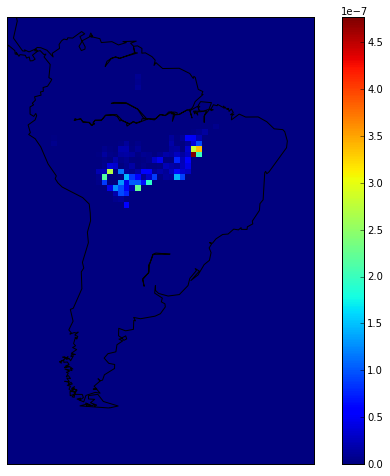

In [19]:
#ba_ebf = np.ma.masked_where(ba_ebf == 0,ba_ebf)
xx, yy = np.meshgrid(np.arange(-180,180,1), np.arange(-90,90,1))
plt.figure(figsize=(10,8))
m = Basemap(projection='cyl', llcrnrlat=-65, urcrnrlat=15, llcrnrlon=-85, urcrnrlon=-30)
m.drawcoastlines()

cax = m.pcolormesh(xx,yy,(ba_ebf)/1e6)
colorbar()
plt.show()

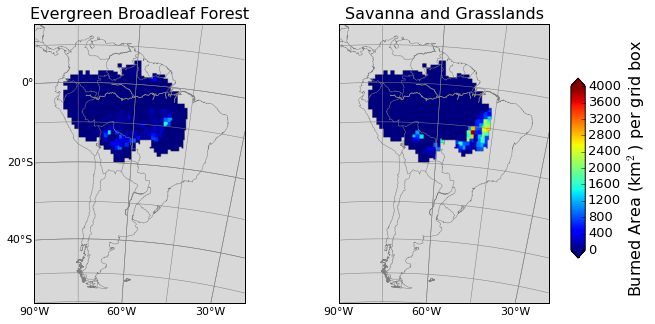

In [26]:
fig = plt.figure(1,figsize=(10,5))

ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1)
ax1.set_title('Evergreen Broadleaf Forest',fontsize=16)
m,nx,ny = make_map()
m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
fluxmap = m.transform_scalar(((ba_ebf*glarea*mask)/1e6),lons,lats,nx,ny,order=0)
q=m.imshow(fluxmap,vmin=0,vmax=4000)

ax1 = plt.subplot2grid((1, 2), (0, 1), colspan=1)
ax1.set_title('Savanna and Grasslands',fontsize=16)
m,nx,ny = make_map()
#m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
fluxmap = m.transform_scalar(((ba_sava*glarea*mask)/1e6),lons,lats,nx,ny,order=0)
q=m.imshow(fluxmap,vmin=0,vmax=4000)
        
cbar_ax = fig.add_axes([0.90, 0.25, 0.02, 0.5]) # left, bottom, width, height
cbar = fig.colorbar(q,cax=cbar_ax,extend='both')

cbar.ax.tick_params(labelsize=13)
cbar.set_label('Burned Area (km$^2$) per grid box', fontsize = 16)
fig.savefig('CASABurnedArea_Ebf_Sav_2010-2014.png',bbox_inches='tight',DPI=1000) # I can add DPI to get higher resolution

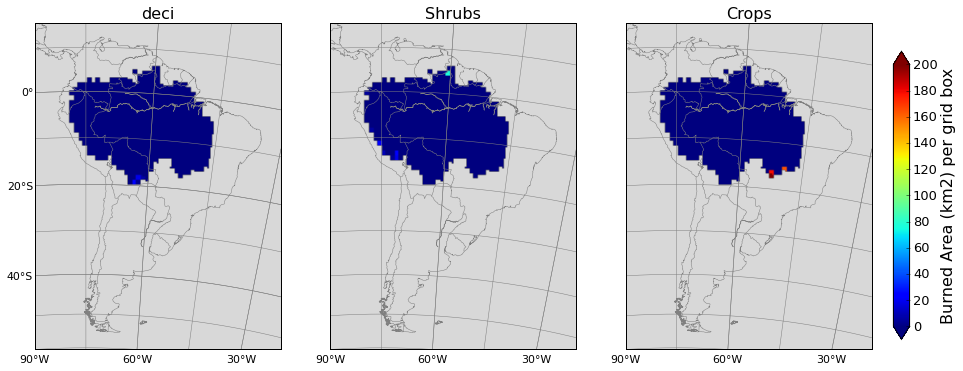

In [153]:
fig = plt.figure(1,figsize=(15,10))

ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=1)
ax1.set_title('deci',fontsize=16)
m,nx,ny = make_map()
m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
fluxmap = m.transform_scalar(((ba_deci*glarea*mask)/1e6),lons,lats,nx,ny,order=0)
q=m.imshow(fluxmap,vmin=0,vmax=200)

ax1 = plt.subplot2grid((1, 3), (0, 1), colspan=1)
ax1.set_title('Shrubs',fontsize=16)
m,nx,ny = make_map()
#m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
fluxmap = m.transform_scalar(((ba_shr*glarea*mask)/1e6),lons,lats,nx,ny,order=0)
q=m.imshow(fluxmap,vmin=0,vmax=200)

ax1 = plt.subplot2grid((1, 3), (0, 2), colspan=1)
ax1.set_title('Crops',fontsize=16)
m,nx,ny = make_map()
#m.drawparallels(np.arange(-40,10,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
m.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)
fluxmap = m.transform_scalar(((ba_crops*glarea*mask)/1e6),lons,lats,nx,ny,order=0)
q=m.imshow(fluxmap,vmin=0,vmax=200)
        
cbar_ax = fig.add_axes([0.92, 0.3, 0.015, 0.4]) # left, bottom, width, height
cbar = fig.colorbar(q,cax=cbar_ax,extend='both')

cbar.ax.tick_params(labelsize=13)
cbar.set_label('Burned Area (km2) per grid box', fontsize = 16)
#fig.savefig('BurnedArea_Ebf_Sav_2010-2014.png',bbox_inches='tight',DPI=1000) # I can add DPI to get higher resolution